Set the path to the folder with experiments_code_s2p.py

In [1]:
path_to_EC = "/Users/anaconda/Desktop/Code/EC"


Set the path to .xlsx file with data from the experiments

In [2]:
path_to_df = "/Volumes/2TB_VIRUS/even_newer_NWB/SCEs_Cicada.xlsx"

In [3]:
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
import sys
sys.path.append(path_to_EC)
%aimport experiments_code_s2p
import experiments_code_s2p as ec
import pandas as pd
from tqdm import notebook
import numpy as np
from scipy.stats import pearsonr, mannwhitneyu, ttest_rel, median_abs_deviation, fisher_exact, kruskal, f_oneway

In [4]:
e_l = ec.load_experiments('main') # Loading all experiments, excluding controls
#e_l_all = ec.load_experiments('all')

  0%|          | 0/208 [00:00<?, ?it/s]

149 main experiments loaded


In [6]:
sce_df = pd.read_excel(path_to_df)

Writing the text:

In [7]:
total_interneurons_number = len(e_l)
FOV_number = len(set([e.baseline_id for e in e_l]))
print(f'A total of {total_interneurons_number} interneurons from {FOV_number} FOVs were stimulated')

A total of 149 interneurons from 53 FOVs were stimulated


In [8]:
all_trials = len(e_l) * 10
significant_responses = sum([sum(e.response) for e in e_l])
print(f'When considering all the trials from all the neurons, \
we found that about a third of the trials induced a significant response \
({significant_responses} out of {all_trials} trials')

When considering all the trials from all the neurons, we found that about a third of the trials induced a significant response (433 out of 1490 trials


In [9]:
low_response_cells_number = len([e for e in e_l if sum(e.response) < 1])
low_response_cells_percentage = round(100 * low_response_cells_number / len(e_l))
high_response_cells_number = len([e for e in e_l if sum(e.response) >= 7])
high_response_cells_percentage = round(100 * high_response_cells_number / len(e_l))
print(f'Indeed, a majority of them responded to less than 10% of the trials \
({low_response_cells_percentage}%, n={low_response_cells_number} ‘low-response’ cells)\
 while only a small majority ({high_response_cells_percentage}%) were reliably entrained by the stimulation and \
 responded to more than 60% of the trials (n={high_response_cells_number} ‘high-response’ cells)')

Indeed, a majority of them responded to less than 10% of the trials (21%, n=32 ‘low-response’ cells) while only a small majority (15%) were reliably entrained by the stimulation and  responded to more than 60% of the trials (n=22 ‘high-response’ cells)


In [10]:
med_response_cells_number = len([e for e in e_l if (sum(e.response) >= 1) & (sum(e.response) < 7)])
med_response_cells_percentage = round(100 * med_response_cells_number / len(e_l))
print(f'The remaining cells ({med_response_cells_percentage}%) responded to between 10 and 60% of the trials (n={med_response_cells_number} “medium-response” cells)')

The remaining cells (64%) responded to between 10 and 60% of the trials (n=95 “medium-response” cells)


In [11]:
print('Run: Compare_baseline_activity_of_mod_cells.ipynb')
print('Of note, cells displaying higher baseline activity exhibited a greater success rate (Pearson r=?, p=?)')

Run: Compare_baseline_activity_of_mod_cells.ipynb
Of note, cells displaying higher baseline activity exhibited a greater success rate (Pearson r=?, p=?)


In [12]:
e_l_controls = ec.load_experiments('controls')
n_of_control_experiments = len(e_l_controls)
responses_percent_in_controls = round(100 * sum([sum(e.response) for e in e_l_controls]) / (n_of_control_experiments * 10))
n_of_control_mice = len(set([e.mouse_id for e in e_l_controls]))
print(f'We also performed control experiments in mice for which interneurons \
expressed tdTomato instead of the opsin and found an average response rate of \
{responses_percent_in_controls}% of the trials  \
(n={n_of_control_experiments} targeted cells, {n_of_control_mice} mice). ')

  0%|          | 0/208 [00:00<?, ?it/s]

19 controls experiments loaded
We also performed control experiments in mice for which interneurons expressed tdTomato instead of the opsin and found an average response rate of 8% of the trials  (n=19 targeted cells, 7 mice). 


In [9]:
inderectly_pos_modulated_cell_n = sum([len(e.pos_mod_cells) for e in e_l if e.pos_mod_cells])
inderectly_neg_modulated_cell_n = sum([len(e.neg_mod_cells) for e in e_l if e.neg_mod_cells])
inderectly_modulated_cell_n = inderectly_pos_modulated_cell_n + inderectly_neg_modulated_cell_n
experiments_with_indirect_modulation = [e for e in e_l if (e.pos_mod_cells) or (e.neg_mod_cells)]
n_FOVs_with_indirect_modulation = len(set([e.baseline_id for e in experiments_with_indirect_modulation]))
n_mice_with_indirect_modulation = len(set([e.mouse_id for e in experiments_with_indirect_modulation]))
print(f'We found that the activity of a small subset of imaged cells \
(n={inderectly_modulated_cell_n} neurons from \
{n_FOVs_with_indirect_modulation} FOVs in {n_mice_with_indirect_modulation} mice) \
could be positively or negatively modulated by the stimulation of single interneurons.')

We found that the activity of a small subset of imaged cells (n=62 neurons from 23 FOVs in 6 mice) could be positively or negatively modulated by the stimulation of single interneurons.


In [13]:
proportion_of_succ_trials = [sum(e.response) for e in e_l]

proportion_of_ind_pos_modulated = [len(e.pos_mod_cells)/sum(e.iscell) if e.pos_mod_cells else 0 for e in e_l]
pearsonr_r_value_pos, pearsonr_p_value_pos = pearsonr(proportion_of_succ_trials, proportion_of_ind_pos_modulated)

proportion_of_ind_neg_modulated = [len(e.neg_mod_cells)/sum(e.iscell) if e.neg_mod_cells else 0 for e in e_l]
pearsonr_r_value_neg, pearsonr_p_value_neg = pearsonr(proportion_of_succ_trials, proportion_of_ind_neg_modulated)



pos_modulated_cells_n = sum([len(e.pos_mod_cells) if e.pos_mod_cells else 0 for e in e_l])
neg_modulated_cells_n = sum([len(e.neg_mod_cells) if e.neg_mod_cells else 0 for e in e_l])

print(f"There was a significant correlation between the number of neurons \
displaying indirect positive or negative modulation \
(n={pos_modulated_cells_n} and {neg_modulated_cells_n}, respectively) \
and the fraction of successful stimulation trials in the target cell \
(Pearson's r={round(pearsonr_r_value_pos, 3)}, p={round(pearsonr_p_value_pos,4)}, \
Pearson's r={round(pearsonr_r_value_neg, 3)}, p={round(pearsonr_p_value_neg,4)}, respectively)")

There was a significant correlation between the number of neurons displaying indirect positive or negative modulation (n=39 and 23, respectively) and the fraction of successful stimulation trials in the target cell (Pearson's r=0.251, p=0.002, Pearson's r=0.295, p=0.0003, respectively)


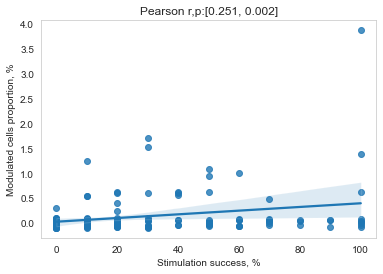

In [21]:
import seaborn as sns

SAVE_TO = '/Users/anaconda/Desktop/Analysis results/pos_mod2succ.svg'

sns.regplot(x=[i*10 for i in proportion_of_succ_trials], y=[i*100 for i in proportion_of_ind_pos_modulated],  x_jitter=0, y_jitter=.1).set(title=f'Pearson r,p:{[round(i,3) for i in pearsonr(proportion_of_succ_trials, proportion_of_ind_pos_modulated)]}')
plt.xlabel('Stimulation success, %')
plt.ylabel('Modulated cells proportion, %')
plt.grid(None)
plt.savefig(SAVE_TO)

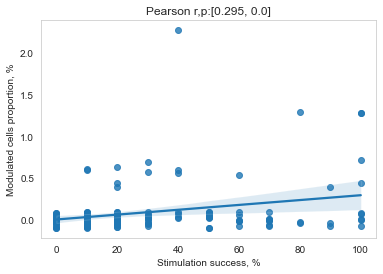

In [22]:
import seaborn as sns

SAVE_TO = '/Users/anaconda/Desktop/Analysis results/neg_mod2succ.svg'

sns.regplot(x=[i*10 for i in proportion_of_succ_trials], y=[i*100 for i in proportion_of_ind_neg_modulated],  x_jitter=0, y_jitter=.1).set(title=f'Pearson r,p:{[round(i,3) for i in pearsonr(proportion_of_succ_trials, proportion_of_ind_neg_modulated)]}')
plt.xlabel('Stimulation success, %')
plt.ylabel('Modulated cells proportion, %')
plt.grid(None)
plt.savefig(SAVE_TO)

In [17]:
pos_modulated_cells_n = sum([len(e.pos_mod_cells) if e.pos_mod_cells else 0 for e in e_l])
neg_modulated_cells_n = sum([len(e.neg_mod_cells) if e.neg_mod_cells else 0 for e in e_l])

BASELINE_LEN = 10000
all_cells_correlation_r = []
pos_cells_correlation_r = []
neg_cells_correlation_r = []
for e in e_l:
    indirectly_mod_cells = np.concatenate([e.pos_mod_cells,e.neg_mod_cells]) if \
        e.pos_mod_cells and e.neg_mod_cells else e.pos_mod_cells or e.neg_mod_cells or []
    if len(indirectly_mod_cells)!= 0:

        for index in e.unmod_cells:
            all_cells_correlation_r.append(pearsonr(e.raw_traces[e.stim_cell_number_l[0]][:BASELINE_LEN], \
                                                    e.raw_traces[index][:BASELINE_LEN])[0])
        if e.pos_mod_cells:
            for index in e.pos_mod_cells:
                pos_cells_correlation_r.append(pearsonr(e.raw_traces[e.stim_cell_number_l[0]][:BASELINE_LEN], \
                                                        e.raw_traces[index][:BASELINE_LEN])[0])
        if e.neg_mod_cells:
            for index in e.neg_mod_cells:
                neg_cells_correlation_r.append(pearsonr(e.raw_traces[e.stim_cell_number_l[0]][:BASELINE_LEN], \
                                                        e.raw_traces[index][:BASELINE_LEN])[0])

p_pos_differs_from_all = mannwhitneyu(all_cells_correlation_r, pos_cells_correlation_r)[1]
p_neg_differs_from_all = mannwhitneyu(all_cells_correlation_r, neg_cells_correlation_r)[1]
k_w_p = kruskal([i for i in all_cells_correlation_r if i is not np.nan], pos_cells_correlation_r, neg_cells_correlation_r)[1]

#print(f'We found that both positively (n={pos_modulated_cells_n}) and negatively (n={neg_modulated_cells_n}) modulated cells \
#were significantly more correlated to the stimulated neuron during baseline than unmodulated cells \
#(Mann Whitney U test: p = {round(p_pos_differs_from_all, 3)}, p = {round(p_neg_differs_from_all, 3)}, respectively)')

print(f'Our findings showed that both positively (n={pos_modulated_cells_n}) and negatively (n={neg_modulated_cells_n}) \
modulated cells had a stronger correlation with the stimulated neuron during baseline compared to unmodulated cells, \
but the difference was not statistically significant (Kruskal–Wallis H-test, three groups, p={round(k_w_p,2)}, see Extended Data Fig. 2b)')

Our findings showed that both positively (n=39) and negatively (n=23) modulated cells had a stronger correlation with the stimulated neuron during baseline compared to unmodulated cells, but the difference was not statistically significant (Kruskal–Wallis H-test, three groups, p=0.17, see Extended Data Fig. 2b)


In [24]:
# All cells, interneurons_excluded = False
pos_mod_distances = []
neg_mod_distances = []
unmod_distances = []
for e in e_l:
    indirectly_mod_cells = np.concatenate([e.pos_mod_cells,e.neg_mod_cells]) if \
        e.pos_mod_cells and e.neg_mod_cells else e.pos_mod_cells or e.neg_mod_cells or []
    if len(indirectly_mod_cells)!= 0:
        if hasattr(e, 'distance_to_stim'):
            for n, dist in enumerate(e.distance_to_stim):
                if dist is not None:
                    if n in e.unmod_cells:
                        unmod_distances.append(dist)
                    else:
                        if e.pos_mod_cells:
                            if n in e.pos_mod_cells:
                                pos_mod_distances.append(dist)
                        if e.neg_mod_cells:
                            if n in e.neg_mod_cells:
                                neg_mod_distances.append(dist)


p_difference_in_distances_pos = mannwhitneyu(pos_mod_distances, unmod_distances)[1]
p_difference_in_distances_neg = mannwhitneyu(neg_mod_distances, unmod_distances)[1]
k_w_p = kruskal(unmod_distances, pos_mod_distances, neg_mod_distances)[1]

print(f'The anatomical distance from the stimulated interneuron was not significantly different\
between modulated and unmodulated cells (Kruskal–Wallis H-test, three groups, \
p={round(k_w_p, 2)}, Extended data Fig. 2a)')

The anatomical distance from the stimulated interneuron was not significantly differentbetween modulated and unmodulated cells (Kruskal–Wallis H-test, three groups, p=0.19, Extended data Fig. 2a)


In [25]:
from statsmodels.stats.weightstats import ztest as ztest

interneurons_pos_mod_l = []
pyramidals_pos_mod_l = []
interneurons_total = []
interneurons_neg_mod_l = []
pyramidals_neg_mod_l = []
pyramidals_total = []

for e in e_l:
    if e.pos_mod_cells:
        interneurons_pos_mod_l.append(len([i for i in e.pos_mod_cells if (i in e.int_cell_number_l) & \
                                           (i not in e.stim_cell_number_l)]))
        pyramidals_pos_mod_l.append(len([i for i in e.pos_mod_cells if (i not in e.int_cell_number_l) & \
                                         (i not in e.stim_cell_number_l)]))
    else:
        interneurons_pos_mod_l.append(0)
        pyramidals_pos_mod_l.append(0)

    if e.neg_mod_cells:
        interneurons_neg_mod_l.append(len([i for i in e.neg_mod_cells if (i in e.int_cell_number_l) & \
                                           (i not in e.stim_cell_number_l)]))
        pyramidals_neg_mod_l.append(len([i for i in e.neg_mod_cells if (i not in e.int_cell_number_l) & \
                                         (i not in e.stim_cell_number_l)]))
    else:
        interneurons_neg_mod_l.append(0)
        pyramidals_neg_mod_l.append(0)

    interneurons_total.append(len([i for i in e.int_cell_number_l if i not in e.stim_cell_number_l]))
    pyramidals_total.append(sum(e.iscell) - interneurons_total[-1] - len(e.stim_cell_number_l))

#print(f'{sum(interneurons_pos_mod_l)}, {sum(pyramidals_pos_mod_l)}, {sum(interneurons_neg_mod_l)}, {sum(pyramidals_neg_mod_l)}')
prop_pos_i = np.array(interneurons_pos_mod_l) / np.array(interneurons_total); prop_pos_i = prop_pos_i[~np.isnan(prop_pos_i)]
prop_pos_p = np.array(pyramidals_pos_mod_l) / np.array(pyramidals_total); prop_pos_p = prop_pos_p[~np.isnan(prop_pos_p)]
prop_neg_i = np.array(interneurons_neg_mod_l) / np.array(interneurons_total); prop_neg_i = prop_neg_i[~np.isnan(prop_neg_i)]
prop_neg_p = np.array(pyramidals_neg_mod_l) / np.array(pyramidals_total); prop_neg_p = prop_neg_p[~np.isnan(prop_neg_p)]

prcnt_pos_p = round(100*np.mean(prop_pos_p), 3)
prcnt_pos_i = round(100*np.mean(prop_pos_i), 3)
prcnt_neg_p = round(100*np.mean(prop_neg_p), 3)
prcnt_neg_i = round(100*np.mean(prop_neg_i), 3)

z_pos, p_pos = ztest(prop_pos_i, prop_pos_p, 0)
z_neg, p_neg = ztest(prop_neg_i, prop_neg_p, 0)

print(f'We found that positively modulated cells were evenly distributed among \
pyramidal cells and interneurons ({prcnt_pos_p}% and {prcnt_pos_i}%,\
Z={round(z_pos, 2)}, p={round(p_pos, 2)}), but interneurons tended \
to be more negatively modulated than pyramidal cells ({prcnt_neg_p}% and {prcnt_neg_i}%, Z={round(z_neg, 2)}, p={round(p_neg, 2)}, Fig. 3d)')

modulated_int = sum(interneurons_pos_mod_l) + sum(interneurons_neg_mod_l)
modulated_pyr = sum(pyramidals_pos_mod_l) + sum(pyramidals_neg_mod_l)

p_for_fishers_test = fisher_exact([[sum(pyramidals_pos_mod_l),sum(interneurons_pos_mod_l)],\
                                   [sum(pyramidals_neg_mod_l),sum(interneurons_neg_mod_l)]])[1]

print(f"Hence, we found relatively similar proportions of positively- \
({round(100*sum(pyramidals_pos_mod_l)/modulated_pyr)}%) and negatively- \
({round(100*sum(pyramidals_neg_mod_l)/modulated_pyr)}%) modulated cells \
among the excitatory cell population (n={modulated_pyr} neurons) while \
an imbalance (Fishers's exact test: p={round(p_for_fishers_test,3)}) \
was observed within the interneuron population which \
displayed a majority of negatively modulated cells \
({round(100*sum(interneurons_neg_mod_l)/modulated_int)}%, n={modulated_int} cells)")

# To implement barnard's test i need to update scipy, so I do it in the different environment
print("(Barnard's exact test: p = 0.038)")

We found that positively modulated cells were evenly distributed among pyramidal cells and interneurons (0.133% and 0.113%,Z=-0.16, p=0.87), but interneurons tended to be more negatively modulated than pyramidal cells (0.072% and 0.642%, Z=1.87, p=0.06, Fig. 3d)
Hence, we found relatively similar proportions of positively- (68%) and negatively- (32%) modulated cells among the excitatory cell population (n=56 neurons) while an imbalance (Fishers's exact test: p=0.023) was observed within the interneuron population which displayed a majority of negatively modulated cells (83%, n=6 cells)
(Barnard's exact test: p = 0.038)


/Users/anaconda/opt/anaconda3/envs/caiman/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide
/Users/anaconda/opt/anaconda3/envs/caiman/lib/python3.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in true_divide


In [57]:
# These npy files are the output of EtoI_Marco.ipynb

# Stim cell included
#arr = np.load('/Users/anaconda/Desktop/Analysis results/MeanEandI/[0, 10].npy')

# Stim cell EXCLUDED
arr = np.load('/Users/anaconda/Desktop/Analysis results/MeanEandI/20230705_183036/[0, 10].npy')

int_mean_activity_baseline = arr[0][arr[0] != 0]
int_mean_activity_stimulation = arr[1][arr[0] != 0]
p_compare_avarage_activity_of_int = ttest_rel(int_mean_activity_baseline, int_mean_activity_stimulation)[1]
non_stim_interneurons_total_number = sum([len([cell for cell in e.int_cell_number_l if cell not in e.stim_cell_number_l]) for e in e_l])
total_mouse_number = len(set([e.mouse_id for e in e_l]))
median_global_inhibition_decrease = np.median((int_mean_activity_baseline - int_mean_activity_stimulation) / int_mean_activity_baseline)
mad_for_global_inh_decrease = median_abs_deviation((int_mean_activity_baseline - int_mean_activity_stimulation) / int_mean_activity_baseline)

print(f'Accordingly, we found a significant decrease by \
{round(median_global_inhibition_decrease*100)}+-{round(mad_for_global_inh_decrease*100)}%, n={non_stim_interneurons_total_number} \
interneurons, {total_mouse_number} mice) in global inhibition during the stimulation period \
as compared with the baseline (t-test p={round(p_compare_avarage_activity_of_int, 4)})')

Accordingly, we found a significant decrease by 17+-35%, n=734 interneurons, 11 mice) in global inhibition during the stimulation period as compared with the baseline (t-test p=0.0274)


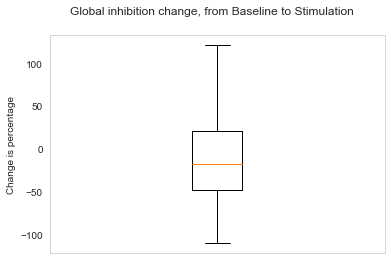

In [22]:
#plt.violinplot(100* (int_mean_activity_baseline - int_mean_activity_stimulation) / int_mean_activity_baseline,\
#               vert=0, showextrema=False, showmedians=True)
plt.boxplot(100* (int_mean_activity_stimulation - int_mean_activity_baseline) / int_mean_activity_baseline, showfliers=0)
plt.suptitle('Global inhibition change, from Baseline to Stimulation')
plt.ylabel('Change is percentage')
plt.xticks([])
plt.grid()
plt.savefig('/Users/anaconda/Desktop/Analysis results/Global_inhibition_change.svg')

In [9]:
# This is from the SCE_freq_all_graphs.ipynb
experiments_with_sce_0_to_10_response = ['135', '137', '141', '221', '231', '235', '241', '293', '296', '318', '320', '330', '334', '342', '349', '351', '359', '380']

mice_l = []
for e in e_l:
    if e.exp_id in experiments_with_sce_0_to_10_response:
        mice_l.append(e.mouse_id)

mice_n = len(set(mice_l))

# Put numbers from the graphs SCE_freq_all_graphs.ipynb and SCE_amplitude_all_graphs.ipynb
print(f"We observed a significant increase in the inter-SCE intervals (Mann-Whitney test, p=?) and "
      f"almost significant increase in the SCE amplitude (number of co-activated cells) (Mann-Whitney test, p=?) "
      f"of SCEs during the stimulation period compared to baseline "
      f"{len(experiments_with_sce_0_to_10_response)} FOVs, {mice_n} mice)")


We observed a significant increase in the inter-SCE intervals (Mann-Whitney test, p=?) and almost significant increase in the SCE amplitude (number of co-activated cells) (Mann-Whitney test, p=?) of SCEs during the stimulation period compared to baseline 18 FOVs, 5 mice)


In [62]:
pyr_mean_activity_baseline = arr[3][arr[0] != 0]
pyr_mean_activity_stimulation = arr[4][arr[0] != 0]
print('However, unexpectedly the E/I balance was not significantly affected by the stimulation')
print(ttest_rel(
    pyr_mean_activity_baseline/int_mean_activity_baseline,
    pyr_mean_activity_stimulation/int_mean_activity_stimulation))

However, unexpectedly the E/I balance was not significantly affected by the stimulation
Ttest_relResult(statistic=-1.109770422180083, pvalue=0.26911561495693387)


In [65]:
SPD_THR = 2
SCE_PROP_THR = 5
SCE_N_THR = 5

freq = []
freq_b = []
freq_s = []
freq_p = []

sel_e = []
for e in e_l:

    b_sce = sce_df.query(
        f'Session == {int(e.exp_id)} &\
         Corresponding_speed <= {SPD_THR} &\
          AllCells_Recruitment_Prop >= {SCE_PROP_THR} &\
           SCE_frame <= {e.stim_first_frames[0]}'
    )['SCE_frame']

    s_sce = sce_df.query(
        f'Session == {int(e.exp_id)} &\
         Corresponding_speed <= {SPD_THR} &\
          AllCells_Recruitment_Prop >= {SCE_PROP_THR} &\
           SCE_frame > {e.stim_first_frames[0]} &\
            SCE_frame <= {e.stim_first_frames[-1] + 100}'
    )['SCE_frame']

    p_sce = sce_df.query(
        f'Session == {int(e.exp_id)} &\
         Corresponding_speed <= {SPD_THR} &\
          AllCells_Recruitment_Prop >= {SCE_PROP_THR} &\
           SCE_frame > {e.stim_first_frames[-1] + 100}'
    )['SCE_frame']


    if len(b_sce)>=SCE_N_THR and len(s_sce)>=SCE_N_THR and len(p_sce)>=SCE_N_THR:

        sce_s = sce_df.loc[
            (sce_df['Session'] == int(e.exp_id)) &
            (sce_df['Corresponding_speed'] <= SPD_THR) &
            (sce_df['AllCells_Recruitment_Prop'] >= SCE_PROP_THR),
            'SCE_frame']

        speed_bin = np.where(e.speed_array >= 2, 1, 0)

        freq.append(8.41 * sce_s.shape[0] / (15000 - np.sum(speed_bin)))
        freq_b.append(8.41 * b_sce.shape[0] / (10000 - np.sum(speed_bin[:10000])))
        freq_s.append(8.41 * p_sce.shape[0] / (e.stim_first_frames[-1] - e.stim_first_frames[0] - np.sum(speed_bin[e.stim_first_frames[0]:e.stim_first_frames[-1]])))
        freq_p.append(8.41 * s_sce.shape[0] / (15000 - (e.stim_first_frames[-1]) - np.sum(speed_bin[10000:e.stim_first_frames[-1]])))

        sel_e.append(e)

In [66]:
print(f'{round(np.mean(freq), 3)}, {round(np.mean(freq_b), 3)}, {round(np.mean(freq_s), 3)}, {round(np.mean(freq_p), 3)}')

0.04, 0.038, 0.042, 0.048


In [67]:
sces_mean_freq = round(np.mean(freq), 3)
sces_std = round(np.std(freq), 3)
sces_fov_n = len(sel_e)
sces_fov_mice_n = len(set([e.mouse_id for e in sel_e]))
print(f'we last asked whether this impacted population dynamics and in particular \
the synchronous network bursts occurring during rest in the form of SCEs. \
SCEs occurred at a frequency similar to the previous experiments \
({sces_mean_freq}±{sces_std} Hz, n={sces_fov_n} FOVs from {sces_fov_mice_n} mice)')

we last asked whether this impacted population dynamics and in particular the synchronous network bursts occurring during rest in the form of SCEs. SCEs occurred at a frequency similar to the previous experiments (0.04±0.018 Hz, n=24 FOVs from 5 mice)


In [63]:
from statsmodels.stats.weightstats import ztest as ztest

def compare_speeds_in_epochs(experiments_list, display=True):
    b = []
    s = []
    p = []
    for e in experiments_list:
        stim_start = e.stim_first_frames[0]
        stim_end = e.stim_first_frames[-1] + 100
        b.append(sum(np.where(e.speed_array[:stim_start] > 2, 1, 0)) / stim_start)
        s.append(sum(np.where(e.speed_array[stim_start:stim_end] > 2, 1, 0)) / (stim_end - stim_start))
        p.append(sum(np.where(e.speed_array[stim_end:] > 2, 1, 0)) / (15000 - stim_end))
    return b,s,p

b,s,p = compare_speeds_in_epochs([e for e in e_l if sum(e.response) >= 8])

z, p_val = ztest(b,s,0)
print(f'Importantly, this change in network dynamics did not reflect a change in behavior since run epochs were similarly distributed during baseline and stimulation periods (Z={round(z, 2)}, p={round(p_val,2)}).')

Importantly, this change in network dynamics did not reflect a change in behavior since run epochs were similarly distributed during baseline and stimulation periods (Z=-0.51, p=0.61).
